# 데이터 불러오기

- 2022년 주유소들의 일자별 가격 데이터
- https://www.opinet.co.kr/user/opdown/opDownload.do

In [1]:
!uv pip install ipykernel pandas matplotlib seaborn

Resolved 40 packages in 446ms
Prepared 8 packages in 3.60s
         If the cache and target directories are on different filesystems, hardlinking may not be supported.
         If this is intentional, set `export UV_LINK_MODE=copy` or use `--link-mode=copy` to suppress this warning.
Installed 12 packages in 2.63s
 + contourpy==1.3.3
 + cycler==0.12.1
 + fonttools==4.60.1
 + kiwisolver==1.4.9
 + matplotlib==3.10.7
 + numpy==2.3.4
 + pandas==2.3.3
 + pillow==12.0.0
 + pyparsing==3.2.5
 + pytz==2025.2
 + seaborn==0.13.2
 + tzdata==2025.2


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'malgun gothic'
plt.rcParams['axes.unicode_minus'] = False

In [3]:
# 상반기, 하반기 주유소 가격 데이터 조회
import pandas as pd

d1 = pd.read_csv('data/2022년_서울_상반기_일별_가격.csv', encoding='cp949')
d2 = pd.read_csv('data/2022년_서울_하반기_일별_가격.csv', encoding='cp949')
d1.shape, d2.shape


((82689, 11), (81793, 11))

In [4]:
# 상반기, 하반기 DataFrame 합치기
# a.info(), b.info()

df = pd.concat([d1, d2], ignore_index=True)
df.shape


(164482, 11)

In [11]:
# DataFrame 기본 정보 조회
# df.shape
# df.info()
# df.head()
# df.tail(10)
df.isnull().sum()
df.describe()
df.describe(include='object')


,번호,지역,상호,주소,상표,셀프여부
count,164482,164482,164482,164482,164482,164482
unique,469,25,464,469,7,2
top,A0009138,서울 강남구,현대주유소,서울 중랑구 용마산로 487 (망우제3동),SK에너지,셀프
freq,365,12278,730,365,48267,92478


In [16]:
# 상표 컬럼의 고유값 조회
df['상표'].unique()
df['상표'].value_counts()
df['상표'].value_counts(normalize=True)

상표
SK에너지     0.293449
현대오일뱅크    0.257481
GS칼텍스     0.245917
S-OIL     0.174864
알뜰주유소     0.021589
자가상표      0.004481
알뜰(ex)    0.002219
Name: proportion, dtype: float64

In [17]:
# 지역 컬럼의 고유값 조회
df['지역'].unique()
df['지역'].value_counts()
df['지역'].value_counts(normalize=True)


지역
서울 강남구     0.074646
서울 강서구     0.071892
서울 송파구     0.068670
서울 서초구     0.068281
서울 영등포구    0.059666
서울 양천구     0.054808
서울 성북구     0.051811
서울 구로구     0.044892
서울 동대문구    0.039968
서울 성동구     0.036515
서울 도봉구     0.036430
서울 은평구     0.035305
서울 노원구     0.033280
서울 서대문구    0.033268
서울 강동구     0.031067
서울 광진구     0.031049
서울 관악구     0.031031
서울 중랑구     0.029626
서울 용산구     0.028192
서울 강북구     0.027115
서울 마포구     0.026599
서울 금천구     0.024726
서울 중구      0.022148
서울 동작구     0.020890
서울 종로구     0.018124
Name: proportion, dtype: float64

> ### str accessor
> - `Series.str.String메소드()`
> - 문자열 타입 Series에 String 메소드들을 사용하여 일괄처리 할 수 있도록 한다.
> - str accessor 메소드 : https://pandas.pydata.org/pandas-docs/stable/reference/series.html#api-series-str

> ### datetime으로 변환
> - `pd.to_datetime(변환할 Series, format="날짜형식")`
> - x 또는 y 축이 날짜 일 경우 datetime 타입으로 처리하는 것이 좋다.
> - format: 년월일의 형식을 strftime 형식문자열로 지정한다. 
>      - [strftime 형식](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes)  
> - datetime을 변환하면 날짜만의 기능을 다룰 수 있다.
>     - dt accessor를 이용해 datetime의 속성값들을(년, 월, 일 등) 추출할 수 있다.
>     - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html


In [27]:
df['주소'].apply(lambda x : x.split(' ')[1])


0         강남구
1         강남구
2         강남구
3         강남구
4         강남구
         ... 
164477    중랑구
164478    중랑구
164479    중랑구
164480    중랑구
164481    중랑구
Name: 주소, Length: 164482, dtype: object

In [29]:
# 지역 컬럼의 값을 이용하여 "구" 컬럼 생성 (지역에서 구만 추출해서 파생변수컬럼 생성해서 구별로로 집계를 할 수있도록 한다.)
unique_region = df['지역'].unique()
s = pd.Series(unique_region)
gu_list = s.str.split().str[1]
gu_list

0      강남구
1      강동구
2      강북구
3      강서구
4      관악구
5      광진구
6      구로구
7      금천구
8      노원구
9      도봉구
10    동대문구
11     동작구
12     마포구
13    서대문구
14     서초구
15     성동구
16     성북구
17     송파구
18     양천구
19    영등포구
20     용산구
21     은평구
22     종로구
23      중구
24     중랑구
dtype: object

In [10]:
# 기간 컬럼을 datetime 타입으로 변경한다.
date_span = df['기간']
date_span
s = pd.Series(date_span)
s_datetime = pd.to_datetime(s, format='%Y%m%d')
s_datetime



0       2022-01-01
1       2022-01-02
2       2022-01-03
3       2022-01-04
4       2022-01-05
           ...    
81788   2022-12-27
81789   2022-12-28
81790   2022-12-29
81791   2022-12-30
81792   2022-12-31
Name: 기간, Length: 164482, dtype: datetime64[ns]

In [11]:
# 기간 컬럼을 이용해 "월", "일", "요일" 컬럼 생성 (dt accessor 이용) (월, 일, 요일 별로 집계할 수있도록 한다.)
df2 = df.copy()
df2['기간']
df2['기간2'] = pd.to_datetime(df2['기간'], format='%Y%m%d')
df2['월'] = df2['기간2'].dt.month
df2['일'] = df2['기간2'].dt.day
df2['요일'] = df2['기간2'].dt.dayofweek
df2.tail(100)

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,기간2,월,일,요일
81693,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),20220923,GS칼텍스,셀프,0,1675,1815,0,2022-09-23,9,23,4
81694,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),20220924,GS칼텍스,셀프,0,1675,1815,0,2022-09-24,9,24,5
81695,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),20220925,GS칼텍스,셀프,0,1675,1815,0,2022-09-25,9,25,6
81696,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),20220926,GS칼텍스,셀프,0,1665,1797,0,2022-09-26,9,26,0
81697,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),20220927,GS칼텍스,셀프,0,1665,1797,0,2022-09-27,9,27,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81788,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),20221227,GS칼텍스,셀프,0,1525,1745,0,2022-12-27,12,27,1
81789,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),20221228,GS칼텍스,셀프,0,1525,1720,0,2022-12-28,12,28,2
81790,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),20221229,GS칼텍스,셀프,0,1525,1720,0,2022-12-29,12,29,3
81791,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),20221230,GS칼텍스,셀프,0,1515,1715,0,2022-12-30,12,30,4


In [ ]:
# 요일 - 0:월, 1:화, 2:수, 3:목, 4:금, 5:토, 6:일 로 변경


In [12]:
# 휘발유 가격이 가장 비싼 5개 행 조회
# df2['위발유'].max().head(5)
df_sorted = df.sort_values(by='휘발유', ascending=False)
top_5_expensive = df_sorted.head(5)
top_5_expensive


,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유
78938,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,20220625,SK에너지,일반,3496,3096,3223,2719
78935,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,20220622,SK에너지,일반,3496,3096,3223,2719
78940,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,20220627,SK에너지,일반,3496,3096,3223,2719
78936,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,20220623,SK에너지,일반,3496,3096,3223,2719
78939,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,20220626,SK에너지,일반,3496,3096,3223,2719


In [ ]:
# 휘발유 가격이 가장 저렴한 5개 행 조회 (단 0원인 주유소 제외)
df_sorted2 = df.sort_values(by='휘발유')
df_sorted2[df_sorted2['휘발유'] > 0].head(5)


,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유
15153,A0000549,서울 강서구,이케이에너지(주) 강서주유소,서울 강서구 화곡로 273 (화곡동),20221227,현대오일뱅크,셀프,0,1410,1660,0
65744,A0001005,서울 양천구,현대주유소,서울 양천구 남부순환로 372 (신월동),20221226,S-OIL,셀프,0,1410,1660,0
15150,A0000549,서울 강서구,이케이에너지(주) 강서주유소,서울 강서구 화곡로 273 (화곡동),20221224,현대오일뱅크,셀프,0,1410,1660,0
16806,A0000519,서울 강서구,화곡역주유소,서울 강서구 강서로 154 (화곡동),20221224,알뜰주유소,셀프,0,1410,1660,0
16808,A0000519,서울 강서구,화곡역주유소,서울 강서구 강서로 154 (화곡동),20221226,알뜰주유소,셀프,0,1410,1660,0


In [22]:
# 고급휘발유 가격이 가장 비싼 5개 행 조회
df.sort_values(by='고급휘발유', ascending=False).head(5)

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유
78940,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,20220627,SK에너지,일반,3496,3096,3223,2719
78938,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,20220625,SK에너지,일반,3496,3096,3223,2719
78939,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,20220626,SK에너지,일반,3496,3096,3223,2719
78936,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,20220623,SK에너지,일반,3496,3096,3223,2719
78937,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,20220624,SK에너지,일반,3496,3096,3223,2719


In [27]:
# 고급휘발유 가격이 가장 저렴한 5개 행 조회 (단 0원인 주유소 제외)
df_sorted3 = df.sort_values(by='고급휘발유')
df_sorted3[df_sorted3['고급휘발유'] > 0].head(5)


,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유
15887,A0000520,서울 강서구,하이웨이주유소,서울특별시 강서구 공항대로 432(화곡동),20221225,S-OIL,셀프,1599,1499,1729,0
15888,A0000520,서울 강서구,하이웨이주유소,서울특별시 강서구 공항대로 432(화곡동),20221226,S-OIL,셀프,1599,1499,1729,0
15889,A0000520,서울 강서구,하이웨이주유소,서울특별시 강서구 공항대로 432(화곡동),20221227,S-OIL,셀프,1599,1499,1729,0
15886,A0000520,서울 강서구,하이웨이주유소,서울특별시 강서구 공항대로 432(화곡동),20221224,S-OIL,셀프,1599,1499,1729,0
15883,A0000520,서울 강서구,하이웨이주유소,서울특별시 강서구 공항대로 432(화곡동),20221221,S-OIL,셀프,1599,1499,1759,0


In [29]:
# 경유 가격이 가장 비싼 5개 행 조회
df.sort_values(by='경유', ascending=False)


,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유
78941,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,20220628,SK에너지,일반,3481,3081,3230,2703
78942,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,20220629,SK에너지,일반,3481,3081,3230,2703
78943,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,20220630,SK에너지,일반,3481,3081,3230,2703
77929,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,20220701,SK에너지,일반,3481,3081,3230,2703
77931,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,20220703,SK에너지,일반,3481,3081,3230,2703
...,...,...,...,...,...,...,...,...,...,...,...
48457,A0009905,서울 서초구,현대오일뱅크㈜직영 사평로주유소,서울 서초구 사평대로 350 (서초동),20220918,현대오일뱅크,일반,0,1742,0,0
32591,A0009600,서울 도봉구,지에스칼텍스㈜ 도봉주유소,서울 도봉구 도봉로 895 (도봉동),20220911,GS칼텍스,셀프,1921,1708,0,0
24791,A0032710,서울 구로구,시몬주유소,서울 구로구 부일로 871,20220727,S-OIL,일반,0,2137,0,0
24790,A0032710,서울 구로구,시몬주유소,서울 구로구 부일로 871,20220726,S-OIL,일반,0,2137,0,0


In [63]:
# 경유 가격이 가장 저렴한 5개 행 조회 (단 0원인 주유소 제외)
df[df['경유'] > 0]
df[df['경유'] > 0].sort_values(by='경유')

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유
45209,A0011826,서울 서초구,만남의광장주유소,서울 서초구 양재대로12길 73-71,20220116,알뜰(ex),셀프,0,1565,1367,0
12345,A0004657,서울 강서구,뉴신정주유소,서울 강서구 곰달래로 207 (화곡동),20220113,알뜰주유소,일반,0,1547,1377,0
12339,A0004657,서울 강서구,뉴신정주유소,서울 강서구 곰달래로 207 (화곡동),20220107,알뜰주유소,일반,0,1547,1377,1397
12344,A0004657,서울 강서구,뉴신정주유소,서울 강서구 곰달래로 207 (화곡동),20220112,알뜰주유소,일반,0,1547,1377,0
16319,A0000519,서울 강서구,화곡역주유소,서울 강서구 강서로 154 (화곡동),20220107,알뜰주유소,셀프,0,1547,1377,0
...,...,...,...,...,...,...,...,...,...,...,...
77929,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,20220701,SK에너지,일반,3481,3081,3230,2703
78941,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,20220628,SK에너지,일반,3481,3081,3230,2703
77931,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,20220703,SK에너지,일반,3481,3081,3230,2703
77930,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,20220702,SK에너지,일반,3481,3081,3230,2703


In [34]:
# 상표별 휘발유 평균가격 조회
df['휘발유'].mean()


np.float64(1877.6008377816418)

In [37]:
# 상표별 휘발유 평균가격 시각화
df.groupby('상표')['휘발유'].mean()

상표
GS칼텍스     1904.899429
S-OIL     1859.282595
SK에너지     1908.900823
알뜰(ex)    1759.884932
알뜰주유소     1767.914672
자가상표      1823.622795
현대오일뱅크    1839.447215
Name: 휘발유, dtype: float64

In [35]:
# 셀프주유소와 일반주유소 개수 확인
df['셀프여부'].value_counts()

셀프여부
셀프    92478
일반    72004
Name: count, dtype: int64

In [36]:
# 셀프 여부에 따른 휘발유 평균 가격 비교 
df.groupby('셀프여부')['휘발유'].mean()


셀프여부
셀프    1818.216376
일반    1953.870993
Name: 휘발유, dtype: float64

In [14]:
# 상표별 일반/셀프 주유소의 휘발유 가격 평균 비교
df.groupby(['상표', '셀프여부'])['휘발유'].mean()



상표      셀프여부
GS칼텍스   셀프      1825.849350
        일반      2001.420217
S-OIL   셀프      1820.122748
        일반      1932.115939
SK에너지   셀프      1826.717027
        일반      2003.229520
알뜰(ex)  셀프      1759.884932
알뜰주유소   셀프      1754.261378
        일반      1796.201557
자가상표    셀프      2017.000000
        일반      1821.768493
현대오일뱅크  셀프      1807.265898
        일반      1877.606059
Name: 휘발유, dtype: float64

In [ ]:
# 상표별 일반/셀프 주유소의 휘발유 가격 평균 비교 시각화


In [ ]:
# 상표별 휘발유 가격의 분포를 boxplot으로 시각화


In [ ]:
# 상표별 일반/셀프 주유소의 휘발유 가격에 대한 분포 확인 - boxplot으로 시각화


In [ ]:
# 구별 휘발유 가격의 평균
df.groupby('지역')['휘발유'].mean()


지역
서울 강북구     1787.319507
서울 금천구     1799.263339
서울 양천구     1799.875541
서울 도봉구     1800.197597
서울 성북구     1805.115935
서울 중랑구     1805.788631
서울 광진구     1818.287644
서울 서대문구    1818.858735
서울 은평구     1821.937317
서울 동대문구    1825.329176
서울 강서구     1829.297928
서울 동작구     1836.980792
서울 송파구     1843.436830
서울 노원구     1845.411765
서울 관악구     1851.051724
서울 영등포구    1863.848380
서울 구로구     1864.676733
서울 마포구     1880.027429
서울 서초구     1902.345027
서울 강동구     1910.691977
서울 성동구     1923.009324
서울 강남구     2024.210946
서울 종로구     2129.215029
서울 중구      2149.957178
서울 용산구     2203.392495
Name: 휘발유, dtype: float64

In [49]:
# 평균 가격이 가장 높은 구의 상표별 휘발유 평균가격
df.groupby('지역')['휘발유'].mean().sort_values(ascending=False)


지역
서울 용산구     2203.392495
서울 중구      2149.957178
서울 종로구     2129.215029
서울 강남구     2024.210946
서울 성동구     1923.009324
서울 강동구     1910.691977
서울 서초구     1902.345027
서울 마포구     1880.027429
서울 구로구     1864.676733
서울 영등포구    1863.848380
서울 관악구     1851.051724
서울 노원구     1845.411765
서울 송파구     1843.436830
서울 동작구     1836.980792
서울 강서구     1829.297928
서울 동대문구    1825.329176
서울 은평구     1821.937317
서울 서대문구    1818.858735
서울 광진구     1818.287644
서울 중랑구     1805.788631
서울 성북구     1805.115935
서울 도봉구     1800.197597
서울 양천구     1799.875541
서울 금천구     1799.263339
서울 강북구     1787.319507
Name: 휘발유, dtype: float64

In [12]:
# 월 평균 휘발유 가격
df2.groupby('월')['휘발유'].mean()

월
1     1704.975625
2     1781.803959
3     2007.941288
4     2030.140766
5     2027.255552
6     2151.490272
7     2082.667822
8     1858.737602
9     1799.546203
10    1737.285143
11    1715.447874
12    1627.068857
Name: 휘발유, dtype: float64

In [103]:
# 각 구의 월별 평균 휘발유 가격 
df2.groupby(['지역', '월'])['휘발유'].mean()


지역      월 
서울 강남구  1     1845.037951
        2     1914.714286
        3     2109.476510
        4     2138.078788
        5     2137.114674
                 ...     
서울 중랑구  8     1773.062035
        9     1717.466667
        10    1654.116625
        11    1629.458974
        12    1566.585608
Name: 휘발유, Length: 300, dtype: float64

C:\Users\Administrator\AppData\Local\Temp\ipykernel_17016\3848483330.py:17: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_17016\3848483330.py:17: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_17016\3848483330.py:17: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_17016\3848483330.py:17: UserWarning: Glyph 55064 (\N{HANGUL SYLLABLE HWI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_17016\3848483330.py:17: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_17016\3848483330.py:17: UserWarni

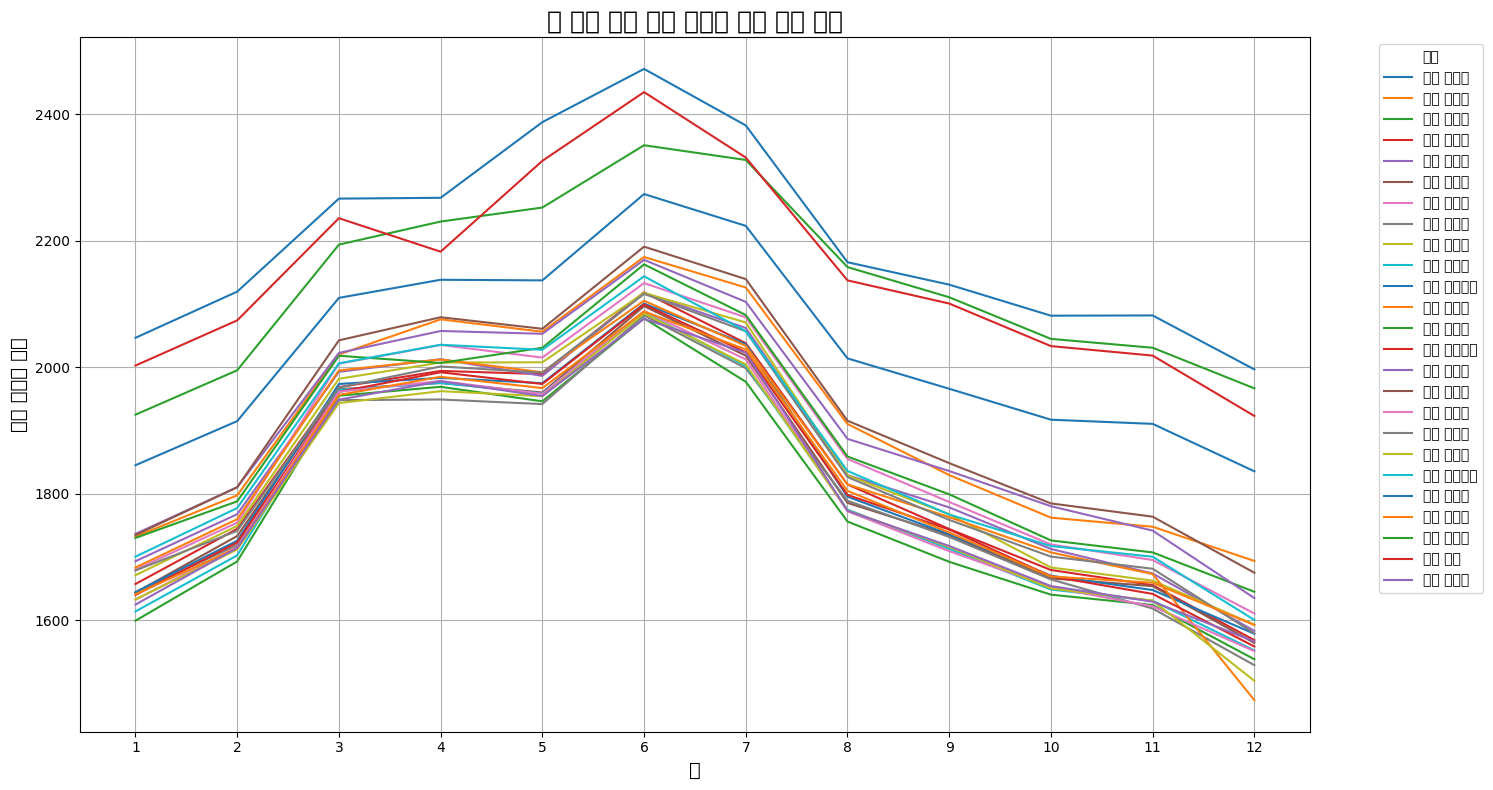

In [13]:
# 각 구의 월별 평균가격의 변화추이 시각화
import matplotlib.pyplot as plt

df_plot = df2.groupby(['지역', '월'])['휘발유'].mean().unstack(level='지역')

# 시각화 실행
plt.figure(figsize=(15, 8)) # 그래프 크기 설정
df_plot.plot(ax=plt.gca()) # 선 그래프 그리기

# 제목 및 레이블 설정
plt.title('각 구의 월별 평균 휘발유 가격 변화 추이', fontsize=18)
plt.xlabel('월', fontsize=14)
plt.ylabel('평균 휘발유 가격', fontsize=14)
plt.legend(title='지역', bbox_to_anchor=(1.05, 1), loc='upper left') # 범례 설정
plt.grid(True)
plt.xticks(df_plot.index) # x축 눈금을 '월' 값으로 설정
plt.tight_layout()
plt.show()


In [4]:
# 가장 휘발유가격이 비싼 주유소 상위 5 - (같은 주유소가 여러개 나오므로 가장 비싼 가격을 기준으로 집계)
df.sort_values(by='휘발유', ascending=False)
df_max_price = df[df['휘발유'] > 0].groupby('상호')['휘발유'].max().reset_index()
df_max_price.sort_values(by='휘발유', ascending=False).head(5)

NameError: name 'df' is not defined

In [86]:
# 가장 휘발유가격이 저렴한 주유소 상위 5 - (같은 주유소가 여러개 나오므로 가장 비싼 가격을 기준으로 집계)
df.sort_values(by='휘발유')
df_min_price = df[df['휘발유'] > 0].groupby('상호')['휘발유'].min().reset_index()
df_min_price.sort_values(by='휘발유').head(5)
# df_min_price.nlargest(5, '휘발유')

,상호,휘발유
458,현대주유소,1410
461,화곡역주유소,1410
310,이케이에너지(주) 강서주유소,1410
152,뉴신정주유소,1415
204,목화주유소,1430


In [100]:
# 휘발유 비싼 주유소의 상위 5개의 상호, 주소, 상표, 셀프여부,  조회 - 위에서 조회한 결과에 추가 정보(상표, 셀프여부 등) 조회 (중복제거-drop_duplicates)
df[df['휘발유'] > 0].drop_duplicates(subset=['상호']).sort_values(by='휘발유', ascending=False).head(5)[['상호', '주소', '상표', '셀프여부', '휘발유']]

,상호,주소,상표,셀프여부,휘발유
78766,서남주유소,서울 중구 통일로 30,SK에너지,일반,2398
72371,서계주유소,서울 용산구 청파로 367 (청파동),GS칼텍스,일반,2390
543,(주)새서울네트웍스 제이제이주유소,서울 강남구 언주로 716,SK에너지,일반,2295
78405,SK에너지(주) 퇴계로주유소,서울 중구 퇴계로 228 (필동2가),SK에너지,일반,2294
79846,필동주유소,서울 중구 퇴계로 196 (필동2가),GS칼텍스,일반,2279


In [102]:
df[df['상호'] == '서남주유소'].sort_values(by='휘발유', ascending=False)

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유
78940,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,20220627,SK에너지,일반,3496,3096,3223,2719
78938,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,20220625,SK에너지,일반,3496,3096,3223,2719
78935,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,20220622,SK에너지,일반,3496,3096,3223,2719
78936,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,20220623,SK에너지,일반,3496,3096,3223,2719
78937,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,20220624,SK에너지,일반,3496,3096,3223,2719
...,...,...,...,...,...,...,...,...,...,...,...
78774,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,20220109,SK에너지,일반,2829,2429,2316,1819
78767,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,20220102,SK에너지,일반,2798,2398,2288,1800
78766,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,20220101,SK에너지,일반,2798,2398,2288,1800
78768,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,20220103,SK에너지,일반,2798,2398,2288,1800


In [99]:
# 휘발유 저렴한 주유소의 상위 5개의 상호, 주소, 상표, 셀프여부,  조회 - 위에서 조회한 결과에 추가 정보(상표, 셀프여부 등) 조회 (중복제거-drop_duplicates)
df[df['휘발유'] > 0].drop_duplicates(subset=['상호']).sort_values(by='휘발유').head(5)[['상호', '주소', '상표', '셀프여부', '휘발유']]

,상호,주소,상표,셀프여부,휘발유
25798,(주)화동유업 화동주유소,서울 금천구 시흥대로 484,SK에너지,셀프,1554
63175,가로공원주유소,서울 양천구 가로공원로 165 (신월동),SK에너지,일반,1556
62632,(주)타이거오일 신정주유소,서울 양천구 중앙로 226 (신정동),SK에너지,셀프,1556
12333,뉴신정주유소,서울 강서구 곰달래로 207 (화곡동),알뜰주유소,일반,1556
16313,화곡역주유소,서울 강서구 강서로 154 (화곡동),알뜰주유소,셀프,1556


In [94]:
# 고급 휘발유를 가장 많이 파는 구 조회
df[df['고급휘발유'] > 0].groupby('지역')['상호'].count().sort_values(ascending=False)

지역
서울 강남구     10784
서울 서초구      8460
서울 송파구      6295
서울 성북구      4727
서울 용산구      4537
서울 강서구      4515
서울 영등포구     4499
서울 성동구      3719
서울 양천구      3145
서울 종로구      2930
서울 은평구      2910
서울 중구       2871
서울 서대문구     2550
서울 광진구      2519
서울 노원구      2361
서울 동작구      1877
서울 도봉구      1838
서울 관악구      1822
서울 마포구      1819
서울 동대문구     1815
서울 금천구      1662
서울 구로구      1598
서울 강동구      1553
서울 중랑구      1225
서울 강북구      1211
Name: 상호, dtype: int64

In [ ]:
###############################################################################
# 주유소 가격 데이터를 이용해서 알고 싶은 정보들을 추가 분석해 보세요.
###############################################################################
